<a href="https://colab.research.google.com/github/Rhythm1821/Assignment-1/blob/main/pytorch_nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network training with different datasets

## 1 Regression Neural Network


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X,y = make_regression(n_samples=1000,n_features=10,noise=2)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [ ]:
class RegressionNN(nn.Module):
  def __init__(self,
               input_features,
               hidden_units,
               output_features):
    super().__init__()
    self.linear_layer_1 = nn.Linear(in_features=input_features,out_features=hidden_units)
    self.linear_layer_2 = nn.Linear(in_features=hidden_units,out_features=hidden_units)
    self.linear_layer_3 = nn.Linear(in_features=hidden_units,out_features=output_features)
  def forward(self,x):
    return self.linear_layer_3(self.linear_layer_2(self.linear_layer_1(x)))

In [ ]:
model_0 = RegressionNN(input_features=10,hidden_units=10,output_features=1)
model_0.to(device)

RegressionNN(
  (linear_layer_1): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
train_loss_val=[]
test_loss_val=[]
epoch_count=[]

epochs = 1001
X_train,X_test = X_train.to(device,torch.float32),X_test.to(device,torch.float32)
y_train,y_test = y_train.to(device,torch.float32),y_test.to(device,torch.float32)

for epoch in range(epochs):
  # Train the model
  model_0.train()


  y_pred = model_0(X_train)

  loss = loss_fn(y_train.unsqueeze(dim=1),y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing the data
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(y_test.unsqueeze(dim=1),test_pred)

  if epoch%100==0:
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)
    epoch_count.append(epoch)
    print(f'Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Train loss: 129.37290954589844 | Test loss: 109.01475524902344
Epoch: 100 | Train loss: 127.90333557128906 | Test loss: 107.60511779785156
Epoch: 200 | Train loss: 118.0063247680664 | Test loss: 98.47895050048828
Epoch: 300 | Train loss: 89.7948989868164 | Test loss: 74.02486419677734
Epoch: 400 | Train loss: 45.8370246887207 | Test loss: 41.32440185546875
Epoch: 500 | Train loss: 12.167272567749023 | Test loss: 11.94042682647705
Epoch: 600 | Train loss: 1.5477523803710938 | Test loss: 1.6504192352294922
Epoch: 700 | Train loss: 1.543518304824829 | Test loss: 1.6381908655166626
Epoch: 800 | Train loss: 1.5435625314712524 | Test loss: 1.6387035846710205
Epoch: 900 | Train loss: 1.5434588193893433 | Test loss: 1.6368392705917358
Epoch: 1000 | Train loss: 1.5434304475784302 | Test loss: 1.637042760848999


In [ ]:
# MSE Loss
# Epoch: 0 | Train loss: 42714.75 | Test loss: 46038.625
# Epoch: 10 | Train loss: 42714.515625 | Test loss: 46038.5703125
# Epoch: 20 | Train loss: 42714.27734375 | Test loss: 46038.515625
# Epoch: 30 | Train loss: 42714.046875 | Test loss: 46038.4609375
# Epoch: 40 | Train loss: 42713.81640625 | Test loss: 46038.41015625
# Epoch: 50 | Train loss: 42713.58984375 | Test loss: 46038.36328125
# Epoch: 60 | Train loss: 42713.3671875 | Test loss: 46038.3203125
# Epoch: 70 | Train loss: 42713.1484375 | Test loss: 46038.28125
# Epoch: 80 | Train loss: 42712.9296875 | Test loss: 46038.23828125
# Epoch: 90 | Train loss: 42712.71484375 | Test loss: 46038.19921875

# Epoch: 0 | Train loss: 26828.69921875 | Test loss: 26928.037109375
# Epoch: 10 | Train loss: 26819.75 | Test loss: 26919.677734375
# Epoch: 20 | Train loss: 26810.802734375 | Test loss: 26911.3203125
# Epoch: 30 | Train loss: 26801.857421875 | Test loss: 26902.96484375
# Epoch: 40 | Train loss: 26792.912109375 | Test loss: 26894.603515625
# Epoch: 50 | Train loss: 26783.974609375 | Test loss: 26886.251953125
# Epoch: 60 | Train loss: 26775.037109375 | Test loss: 26877.904296875
# Epoch: 70 | Train loss: 26766.107421875 | Test loss: 26869.5546875
# Epoch: 80 | Train loss: 26757.177734375 | Test loss: 26861.208984375
# Epoch: 90 | Train loss: 26748.251953125 | Test loss: 26852.861328125

# L1 Loss
# Epoch: 1000 | Train loss: 26033.791015625 | Test loss: 26210.474609375
# Epoch: 2000 | Train loss: 25179.96484375 | Test loss: 25396.19921875
# Epoch: 3000 | Train loss: 24349.28515625 | Test loss: 24598.109375
# Epoch: 4000 | Train loss: 23539.41015625 | Test loss: 23815.666015625
# Epoch: 5000 | Train loss: 22748.744140625 | Test loss: 23046.865234375

# Epoch: 1000 | Train loss: 118.40008544921875 | Test loss: 119.21858978271484
# Epoch: 2000 | Train loss: 116.31094360351562 | Test loss: 117.27717590332031
# Epoch: 3000 | Train loss: 114.24134826660156 | Test loss: 115.32990264892578
# Epoch: 4000 | Train loss: 112.18978881835938 | Test loss: 113.38880920410156
# Epoch: 5000 | Train loss: 110.14192962646484 | Test loss: 111.4547348022461

# 1 Hidden layer
# Epoch: 0 | Train loss: 130.98681640625 | Test loss: 130.99559020996094
# Epoch: 1000 | Train loss: 81.64506530761719 | Test loss: 82.77690887451172
# Epoch: 2000 | Train loss: 1.5128850936889648 | Test loss: 1.5725997686386108
# Epoch: 3000 | Train loss: 1.51263427734375 | Test loss: 1.5749320983886719
# # Epoch: 4000 | Train loss: 1.5126311779022217 | Test loss: 1.5749702453613281
# Epoch: 5000 | Train loss: 1.5126426219940186 | Test loss: 1.5755642652511597

# 2 Linear layers
# Epoch: 0 | Train loss: 130.98681640625 | Test loss: 130.99559020996094
# Epoch: 1000 | Train loss: 81.64506530761719 | Test loss: 82.77690887451172
# Epoch: 2000 | Train loss: 1.5128850936889648 | Test loss: 1.5725997686386108
# Epoch: 3000 | Train loss: 1.51263427734375 | Test loss: 1.5749320983886719
# Epoch: 4000 | Train loss: 1.5126311779022217 | Test loss: 1.5749702453613281
# Epoch: 5000 | Train loss: 1.5126426219940186 | Test loss: 1.5755642652511597

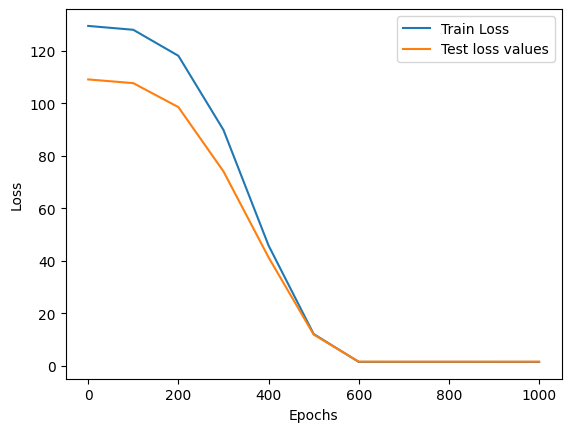

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined the epoch_count, train_loss_val, and test_loss_val variables

plt.plot(epoch_count, np.array(torch.tensor(train_loss_val).cpu().numpy()), label='Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_val).cpu().numpy()), label='Test loss values')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [ ]:
model_0.train()

with torch.inference_mode():
  test_pred = model_0(X_test)
  loss = loss_fn(y_test,test_pred)
  print(f'Test loss: {test_loss}')

Test loss: 1.637042760848999


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


## 2 Binary Classification Neural Network

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train,X_test = X_train.to(device,dtype=torch.float32), X_test.to(device,dtype=torch.float32)
y_train,y_test = y_train.to(device,dtype=torch.float32),y_test.to(device,dtype=torch.float32)

In [ ]:
class BinaryNN(nn.Module):
  def __init__(self,in_features,hidden_units,out_features):
    super().__init__()
    self.linear_block_1 = nn.Linear(in_features=in_features,
                                                  out_features=out_features)
                                        # nn.functional.sigmoid(input=))
  def forward(self,x):
    return nn.Sigmoid()(self.linear_block_1(x))

In [ ]:
model_1 = BinaryNN(in_features=10,
              hidden_units=10,
              out_features=1).to(device)

In [ ]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

In [ ]:
loss_fn = nn.BCELoss()
acc_fn = Accuracy(task='binary').to(device)
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')

X_train: torch.Size([800, 10]) | X_test: torch.Size([200, 10]) | y_train: torch.Size([800]) | y_test: torch.Size([200])


In [ ]:
train_loss_val=[]
test_loss_val=[]
epoch_count=[]
epochs = 1001

for epoch in range(epochs):
  # Train the model
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)
  # print(f'y_pred: {y_pred}')
  # Calculate the loss
  loss = loss_fn(y_pred.squeeze(dim=1),y_train)
  acc = acc_fn(y_pred.squeeze(dim=1),y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  with torch.inference_mode():
    model_1.eval()

    test_pred = model_1(X_test)

    test_loss = loss_fn(y_test,test_pred.squeeze(dim=1))
    test_acc = acc_fn(test_pred.squeeze(dim=1),y_test)

  if epoch%100==0:
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)
    epoch_count.append(epoch)
    print(f'Epoch: {epoch} | Train loss: {loss} | Train accuracy: {acc} | Test loss: {test_loss} | Test accuracy: {test_acc}')

Epoch: 0 | Train loss: 0.5847253203392029 | Train accuracy: 0.6812499761581421 | Test loss: 39.654998779296875 | Test accuracy: 0.7350000143051147
Epoch: 100 | Train loss: 0.39449039101600647 | Train accuracy: 0.8512499928474426 | Test loss: 29.35575294494629 | Test accuracy: 0.875
Epoch: 200 | Train loss: 0.33830520510673523 | Train accuracy: 0.8824999928474426 | Test loss: 25.605247497558594 | Test accuracy: 0.8600000143051147
Epoch: 300 | Train loss: 0.3134204149246216 | Train accuracy: 0.8849999904632568 | Test loss: 23.717119216918945 | Test accuracy: 0.8550000190734863
Epoch: 400 | Train loss: 0.30001476407051086 | Train accuracy: 0.8912500143051147 | Test loss: 22.58460807800293 | Test accuracy: 0.8550000190734863
Epoch: 500 | Train loss: 0.2919462025165558 | Train accuracy: 0.8962500095367432 | Test loss: 21.832094192504883 | Test accuracy: 0.8600000143051147
Epoch: 600 | Train loss: 0.28673335909843445 | Train accuracy: 0.8987500071525574 | Test loss: 21.2979679107666 | Test a

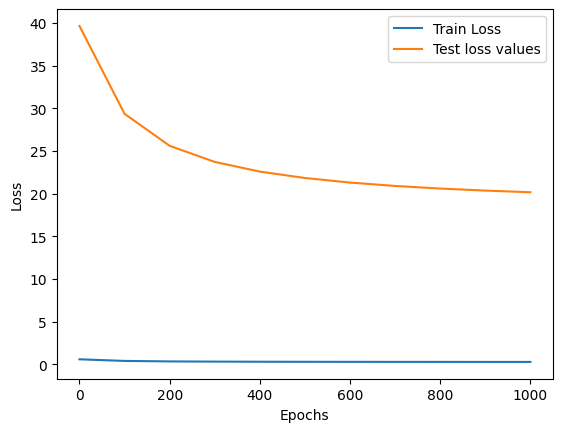

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined the epoch_count, train_loss_val, and test_loss_val variables

plt.plot(epoch_count, np.array(torch.tensor(train_loss_val).cpu().numpy()), label='Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_val).cpu().numpy()), label='Test loss values')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
